# Radar observation : reflectivity composite product

The aim of this notebook is to indicate how to read the reflectivity data.

For each pixel is indicated a rainfall rate expressed in mm.h<sup>-1</sup>. If the value is missing, the value is -1. The value 999 is arbitrary : we use it when the rainfall rate is superior to 864.7 mm.h<sup>-1</sup> (it is not possible to estimate the rainfall rate beyond this value).

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).
The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 1 km.

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*

In [1]:
#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE BASEMAP LIBRARY -> PROBLEM OF TYPE "KeyError : 'PROJ_LIB'" (cf next cell)#####
#indicate the path to the file 'epsg'
#(located normally into the directory /Library/share of Anaconda) via the next commands : 
import os
os.environ["PROJ_LIB"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share"   #-> type example of path

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 
from coordinates_and_projection import *

In [5]:
####Cell containing the modifiable fields######
path = 'D:/prez_opendata/data/output/samples/radar/reflectivity/'   #path to the reflectivity data
zone = 'SE'      #study zone 
date_i = '20180501'     #start date of the file
date_f = '20180510'     #end date of the file
#days to select (/!\ each file containts at most 10 or 11 days)
#modifiable field because the data might be too heavy according to the available RAM.
day_i = 1           #number of the first day
day_f = 10           #number of the last day
#multiplication coefficient for the graphic representation (in 1/coeff mm/h)
#/!\### the colorbar is adapted to the coefficient 10 (cf plot at the end)
coeff = 10      

In [8]:
complete_path = path + zone + '/' + str(date_i[0:4]) + '/' + str(date_i[4:6]) + '/'

file = zone+'_'+date_i+'_'+date_f+'_reflectivity.npz'      #file name

nb_per_day = 24*12     #number of files par day (frequency, 5 min)

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [9]:
#data loading
d = np.load(complete_path+file,allow_pickle=True)
#subset of data from the first day day_i to the last day day_f
data = d['data'][(day_i-1)*nb_per_day:(day_f)*nb_per_day,:,:]       #reflectivity values 
dates = d['dates'][(day_i-1)*nb_per_day:(day_f)*nb_per_day]         #associated dates

Data dimensions: 
<ul>
<li>time dimension(=days number*24*12 -> time frequency of 5min)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>    

In [10]:
data.shape

(2880, 453, 689)

Dimensions of the 'dates' array:
<ul>
    <li>time dimension(=days number*24*12 -> time frequency of 5 min)</li>
</ul>

In [11]:
dates.shape

(2880,)

Overview of dates values :

In [12]:
dates

array([datetime.datetime(2018, 5, 1, 0, 5),
       datetime.datetime(2018, 5, 1, 0, 5),
       datetime.datetime(2018, 5, 1, 0, 10), ...,
       datetime.datetime(2018, 5, 10, 23, 45),
       datetime.datetime(2018, 5, 10, 23, 50),
       datetime.datetime(2018, 5, 10, 23, 55)], dtype=object)

Overview of data of type int16

In [14]:
data

array([[[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0

Set of possible values over the chosen period at the beggining of the notebook 

In [15]:
values=np.unique(data)
values

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  13,
        15,  17,  20,  23,  27,  31,  36,  42,  48,  56,  64,  74,  86,
        99, 115, 133, 153, 177, 205, 236, 273, 315, 364, 421, 486, 561,
       648, 999], dtype=int16)

Plot example for a given time step and a given zone :

<IPython.core.display.Javascript object>


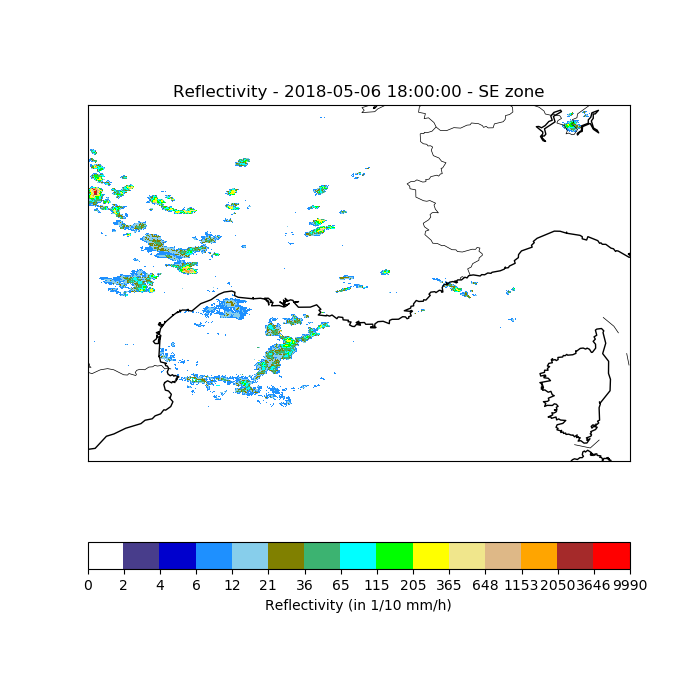

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [17]:
index = 1656   #index for the time dimension

fig,ax=plt.subplots(1,1,figsize=(7,7))
data_plot = coeff*data

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
#/!\### the scale is adapted to the coefficient 10
if (np.nanmax(data_plot) > 3646):
    borne_max = np.nanmax(data_plot)
else:
    borne_max = 3646 + 10
cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                  ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data_plot[index,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Reflectivity (in 1/10 mm/h)')
plt.title("Reflectivity - " + str(dates[index]) + " - " + zone+ " zone")
plt.show()

In [18]:
d.fid.close()